In [1]:
# 📌 Линейная регрессия в Jupyter Notebook

# **Импортируем библиотеки**
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# **1. Создаем данные: рост, возраст → вес**
X = np.array([
    [1.7, 25], [1.8, 30], [1.6, 20], [1.75, 35],
    [1.65, 40], [1.85, 45], [1.55, 18], [1.70, 29],
    [1.78, 33], [1.62, 21]
])
y = np.array([70, 80, 55, 78, 65, 90, 50, 74, 82, 58])

# **2. Разделяем данные на train и validation (80% / 20%)**
N = len(X)
split_idx = int(N * 0.8)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# **3. Инициализируем случайные веса**
w1, w2 = np.random.randn(), np.random.randn()
b = np.random.randn()

# 📌 4. Определяем параметры обучения
learning_rate = 0.001  
epochs = 1000
losses = []  # Храним значения ошибки
w1_history, w2_history, b_history = [], [], []  # Храним историю весов

# **5. Функция потерь (MSE)**
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [13]:
# 📌 6. Обучение модели с визуализацией процесса
for epoch in range(epochs):
    y_pred = w1 * X_train[:, 0] + w2 * X_train[:, 1] + b
    loss = mse(y_train, y_pred)
    losses.append(loss)
    
    # Сохраняем текущие веса в истории
    w1_history.append(w1)
    w2_history.append(w2)
    b_history.append(b)
    
    # Вычисление градиентов
    dw1 = -2 * np.mean((y_train - y_pred) * X_train[:, 0])
    dw2 = -2 * np.mean((y_train - y_pred) * X_train[:, 1])
    db = -2 * np.mean(y_train - y_pred)
    
    # Обновление весов
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2
    b -= learning_rate * db
    
    # Вывод ошибки каждые 100 эпох
    if epoch % 100 == 0:
        print(f"Эпоха {epoch}, Ошибка: {loss:.3f}, w1={w1:.5f}, w2={w2:.5f}, b={b:.5f}")


Эпоха 0, Ошибка: 93.399, w1=7.15725, w2=1.71376, b=4.55400
Эпоха 100, Ошибка: 88.832, w1=7.74147, w2=1.67217, b=4.89021
Эпоха 200, Ошибка: 84.695, w1=8.29873, w2=1.63292, b=5.20832
Эпоха 300, Ошибка: 80.946, w1=8.83033, w2=1.59573, b=5.50922
Эпоха 400, Ошибка: 77.549, w1=9.33748, w2=1.56039, b=5.79373
Эпоха 500, Ошибка: 74.470, w1=9.82139, w2=1.52679, b=6.06264
Эпоха 600, Ошибка: 71.679, w1=10.28316, w2=1.49482, b=6.31671
Эпоха 700, Ошибка: 69.150, w1=10.72387, w2=1.46439, b=6.55664
Эпоха 800, Ошибка: 66.857, w1=11.14453, w2=1.43543, b=6.78313
Эпоха 900, Ошибка: 64.778, w1=11.54611, w2=1.40785, b=6.99683


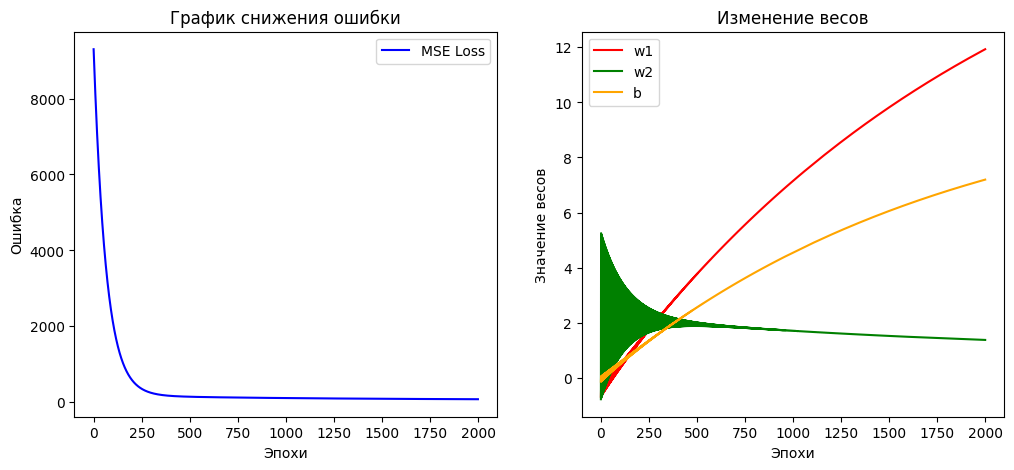

📊 Ошибка на валидационных данных (MSE): 34.832

📊 Сравнение предсказаний и реальных значений на валидации:
Реальный вес: 82.00 кг | Предсказанный: 74.03 кг
Реальный вес: 58.00 кг | Предсказанный: 55.54 кг


In [14]:
# **7. График снижения ошибки (Loss Curve)**
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='MSE Loss', color='blue')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График снижения ошибки')
plt.legend()

# **График изменения весов**
plt.subplot(1, 2, 2)
plt.plot(w1_history, label='w1', color='red')
plt.plot(w2_history, label='w2', color='green')
plt.plot(b_history, label='b', color='orange')
plt.xlabel('Эпохи')
plt.ylabel('Значение весов')
plt.title('Изменение весов')
plt.legend()

plt.show()

# **8. Оценка модели на тестовых данных (валидация)**
y_val_pred = w1 * X_val[:, 0] + w2 * X_val[:, 1] + b
val_loss = mse(y_val, y_val_pred)
print(f"📊 Ошибка на валидационных данных (MSE): {val_loss:.3f}")

# **9. Выведем предсказания и сравним с реальными значениями**
print("\n📊 Сравнение предсказаний и реальных значений на валидации:")
for real, pred in zip(y_val, y_val_pred):
    print(f"Реальный вес: {real:.2f} кг | Предсказанный: {pred:.2f} кг")



In [15]:
# **8. Оценка модели на тестовых данных (валидация)**
y_val_pred = w1 * X_val[:, 0] + w2 * X_val[:, 1] + b
val_loss = mse(y_val, y_val_pred)
print(f"📊 Ошибка на валидационных данных (MSE): {val_loss:.3f}")

📊 Ошибка на валидационных данных (MSE): 34.832


In [16]:
# **9. Тестируем модель на новых данных**
рост = 1.72
возраст = 28
предсказанный_вес = w1 * рост + w2 * возраст + b
print(f"🔮 Предсказанный вес для роста {рост}м и возраста {возраст} лет: {предсказанный_вес:.2f} кг")


🔮 Предсказанный вес для роста 1.72м и возраста 28 лет: 66.40 кг
